### Finding betas and predicting using Advertising dataset

In [34]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [62]:
df = pd.read_csv("datasets/advertising4D.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


### checking Overfitting, correlation between input features and output

Correlation coefficient between TV and Sales:  0.7822244248616063
Correlation coefficient between Radio and Sales:  0.5762225745710553
Correlation coefficient between Newspaper and Sales:  0.22829902637616534


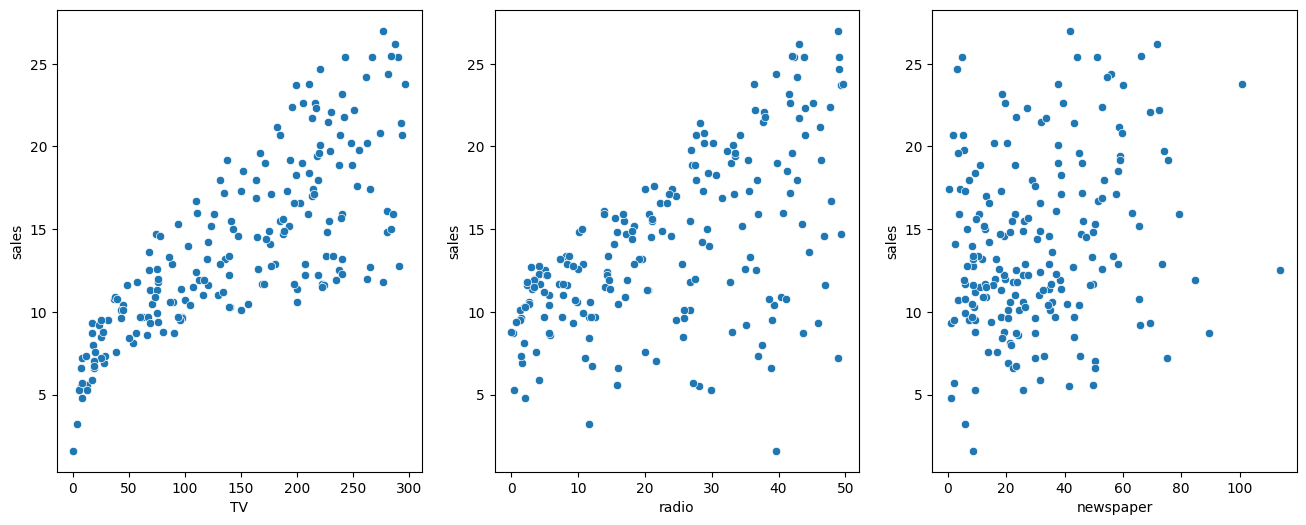

In [40]:
tv = df['TV']
radio = df['radio']
newspaper = df['newspaper']

sales = df['sales']

fig , (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,6))

#checking correlation between TV and sales
tv_sales = (np.sum(np.multiply(tv - np.mean(tv), sales - np.mean(sales)))) / (np.multiply((np.sqrt(np.sum((tv - np.mean(tv))**2))),  np.sqrt(np.sum((sales - np.mean(sales))**2))))
sns.scatterplot(x='TV', y='sales', data=df, ax = ax1)
print("Correlation coefficient between TV and Sales: ", tv_sales)

#checking correlation between Radio and sales
rad_sales = (np.sum(np.multiply(radio - np.mean(radio), sales - np.mean(sales)))) / (np.multiply((np.sqrt(np.sum((radio - np.mean(radio))**2))),  np.sqrt(np.sum((sales - np.mean(sales))**2))))
sns.scatterplot(x='radio', y='sales', data=df, ax = ax2)
print("Correlation coefficient between Radio and Sales: ", rad_sales)

#checking correlation between Newspaper and sales
newspaper_sales = (np.sum(np.multiply(newspaper - np.mean(newspaper), sales - np.mean(sales)))) / (np.multiply((np.sqrt(np.sum((newspaper - np.mean(newspaper))**2))),  np.sqrt(np.sum((sales - np.mean(sales))**2))))
sns.scatterplot(x='newspaper', y='sales', data=df, ax = ax3)
print("Correlation coefficient between Newspaper and Sales: ", newspaper_sales)

### Now checking the multicolliniarity between the features

Correlation coefficient between radio and Sales:  0.054808664465830104
Correlation coefficient between TV and Newspaper:  0.05664787496505701
Correlation coefficient between Newspaper and Radio:  0.35410375076117534


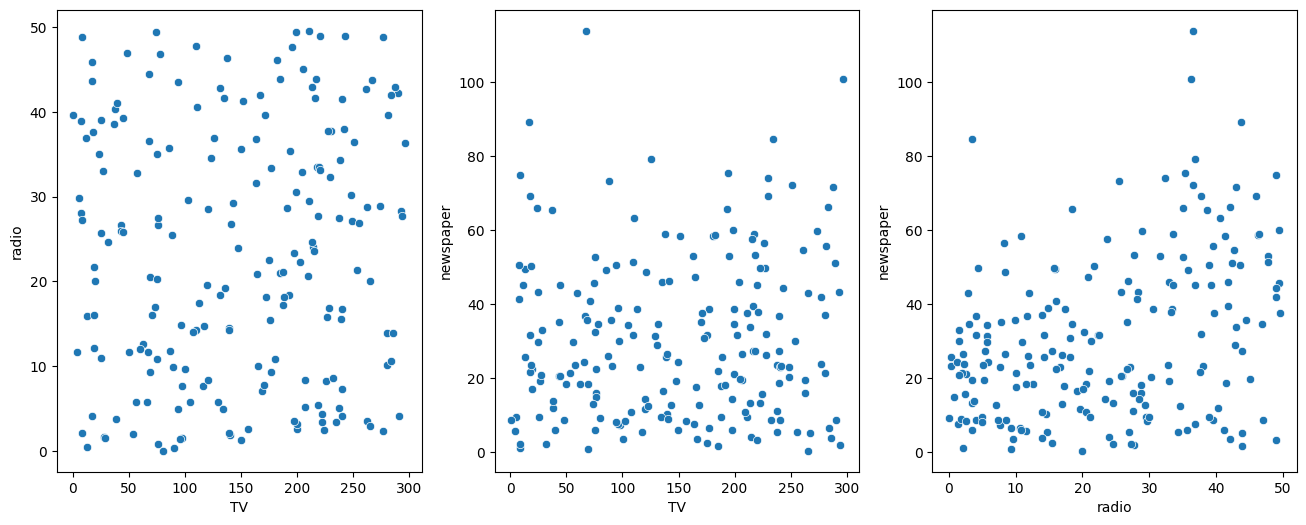

In [46]:
tv = df['TV']
radio = df['radio']
newspaper = df['newspaper']

sales = df['sales']

fig , (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,6))

#checking correlation between TV and sales
tv_radio = (np.sum(np.multiply(tv - np.mean(tv), radio - np.mean(radio)))) / (np.multiply((np.sqrt(np.sum((tv - np.mean(tv))**2))),  np.sqrt(np.sum((radio - np.mean(radio))**2))))
sns.scatterplot(x='TV', y='radio', data=df, ax = ax1)
print("Correlation coefficient between radio and Sales: ", tv_radio)

#checking correlation between Radio and sales
tv_newspaper = (np.sum(np.multiply(tv - np.mean(tv), newspaper - np.mean(newspaper)))) / (np.multiply((np.sqrt(np.sum((tv - np.mean(tv))**2))),  np.sqrt(np.sum((newspaper - np.mean(newspaper))**2))))
sns.scatterplot(x='TV', y='newspaper', data=df, ax = ax2)
print("Correlation coefficient between TV and Newspaper: ", tv_newspaper)

#checking correlation between Newspaper and sales
newspaper_radio = (np.sum(np.multiply(radio - np.mean(radio), newspaper - np.mean(newspaper)))) / (np.multiply((np.sqrt(np.sum((radio - np.mean(radio))**2))),  np.sqrt(np.sum((newspaper - np.mean(newspaper))**2))))
sns.scatterplot(x='radio', y='newspaper', data=df, ax = ax3)
print("Correlation coefficient between Newspaper and Radio: ", newspaper_radio)

### calculate X Matrix and y vector

In [55]:
#calculating y vector
y = np.array(df['sales'])

#calculating X Matrix
features = np.array(df.drop('sales', axis=1))

#inserting 1 in whole array as a column
X = np.insert(features, 0, 1, axis=1)
y, X

(array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
        17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
         5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
        17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
         8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
        23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
         9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
        14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
        12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
        17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
        13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
         7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
         5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
        10.4, 11.4, 10.3, 13.2, 25.4, 

### Calculating the Betas value

In [58]:
betas = (np.linalg.inv(X.T@X)) @ (y.T@X)
betas

array([ 2.93888937e+00,  4.57646455e-02,  1.88530017e-01, -1.03749304e-03])

### Predicting with new test instance with(76, 20, 70)

In [85]:
tv = 76
radio = 20
newspaper = 70
pred_sales = betas[0] + betas[1]*tv + betas[2]*radio + betas[3]*newspaper
pred_sales

10.114978249460407

### calculating Adjusted R2Score

In [87]:
#first calculate R2 score

#calculating y_hat
y_hat = betas[0] + betas[1]*df['TV'] + betas[2]*df['radio'] +betas[3]*df['newspaper']


SSE = np.sum((y-y_hat)**2)
SST = np.sum((y-np.mean(y))**2)

r2 = 1 - (SSE / SST)

#calculating adjusted R2Score
n = len(X)
m = 3

r2a = 1 - ((np.multiply(1-r2, n-1)) / (n-m-1))
r2a

0.8956373316204667